# 지하철 이용객 분석
- https://data.busan.go.kr/
- 승하차 인원정보 검색
- 일별 역별 지산대 승하차 파일 받기
- 최신 csv 파일로 받기

In [10]:
import pandas as pd
file_path = './ref/일별 역별 시간대별 승하차인원(2025년 1월).csv'
df = pd.read_csv(file_path, encoding="EUC-KR")
df.head() # 맨 앞 데이터 5개 가져오기
# df.tail()

,역번호,역명,년월일,요일,구분,합계,01시-02시,02시-03시,03시-04시,04시-05시,...,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,24시-01시
0,95,다대포해수욕장,2025-01-01,수,승차,8126,0,1,0,14,...,527,498,517,266,170,98,79,38,10,0
1,95,다대포해수욕장,2025-01-01,수,하차,7674,0,1,0,0,...,376,357,295,185,132,81,74,50,71,46
2,95,다대포해수욕장,2025-01-02,목,승차,4893,1,0,0,21,...,472,364,373,210,159,87,90,57,13,0
3,95,다대포해수욕장,2025-01-02,목,하차,3965,1,4,0,1,...,311,339,296,321,239,143,99,92,82,49
4,95,다대포해수욕장,2025-01-03,금,승차,4572,0,0,0,27,...,401,300,363,237,139,102,70,69,13,0


In [11]:
columns = ['num', 'name', 'date', 'week', 'type', 'total']
time_col = [f'{i}h-{i+1}H' for i in range(1,24)]
columns = columns + time_col + ['24~01H']
df.columns = columns
df = df.loc[:,:'total']

In [13]:
df.head()

,num,name,date,week,type,total
0,95,다대포해수욕장,2025-01-01,수,승차,8126
1,95,다대포해수욕장,2025-01-01,수,하차,7674
2,95,다대포해수욕장,2025-01-02,목,승차,4893
3,95,다대포해수욕장,2025-01-02,목,하차,3965
4,95,다대포해수욕장,2025-01-03,금,승차,4572


In [23]:
data = df.groupby(['num', 'name', 'date', 'week']).sum().reset_index()
# data[data['date'] == '2025-01-01']
data

,num,name,date,week,type,total
0,95,다대포해수욕장,2025-01-01,수,승차하차,15800
1,95,다대포해수욕장,2025-01-02,목,승차하차,8858
2,95,다대포해수욕장,2025-01-03,금,승차하차,8279
3,95,다대포해수욕장,2025-01-04,토,승차하차,8477
4,95,다대포해수욕장,2025-01-05,일,승차하차,6912
...,...,...,...,...,...,...
3467,414,안평,2025-01-27,월,승차하차,2716
3468,414,안평,2025-01-28,화,승차하차,1987
3469,414,안평,2025-01-29,수,승차하차,1633
3470,414,안평,2025-01-30,목,승차하차,2037


In [29]:
gdata = data[['name', 'date', 'total']]
gdata = gdata.sort_values(by=['name', 'date'], ascending=[True, True])
gdata.head(10)

,name,date,total
1860,가야,2025-01-01,3953
1861,가야,2025-01-02,7242
1862,가야,2025-01-03,7293
1863,가야,2025-01-04,5609
1864,가야,2025-01-05,3945
1865,가야,2025-01-06,7469
1866,가야,2025-01-07,7217
1867,가야,2025-01-08,7324
1868,가야,2025-01-09,7110
1869,가야,2025-01-10,7052


In [31]:
mdata = gdata.groupby(by="name").sum().reset_index()
tdata = mdata[['name', 'total']]
tdata

,name,total
0,가야,194925
1,감전,211937
2,강서구청,140162
3,개금,442819
4,거제,313595
...,...,...
103,토성,436698
104,하단,1003733
105,해운대,803371
106,호포,67287


In [67]:
sdata = tdata.sort_values(by='total', ascending=False)
sdata.head(10)
total_data = sdata[:20]
total_data

,name,total
70,서면,3626209
83,연산,1500575
61,부산역,1337149
65,사상,1230792
36,동래,1089751
72,센텀시티,1083780
88,자갈치,1070458
23,남포,1045512
64,부전,1008329
104,하단,1003733


In [39]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

d2_path = "./ref/D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(d2_path)
plt.rcParams["font.family"] = "D2Coding"

In [42]:
# for font in fm.findSystemFonts():
#     print(font)
# print(plt.rcParams["font.family"])

In [47]:
# !pip install squarify

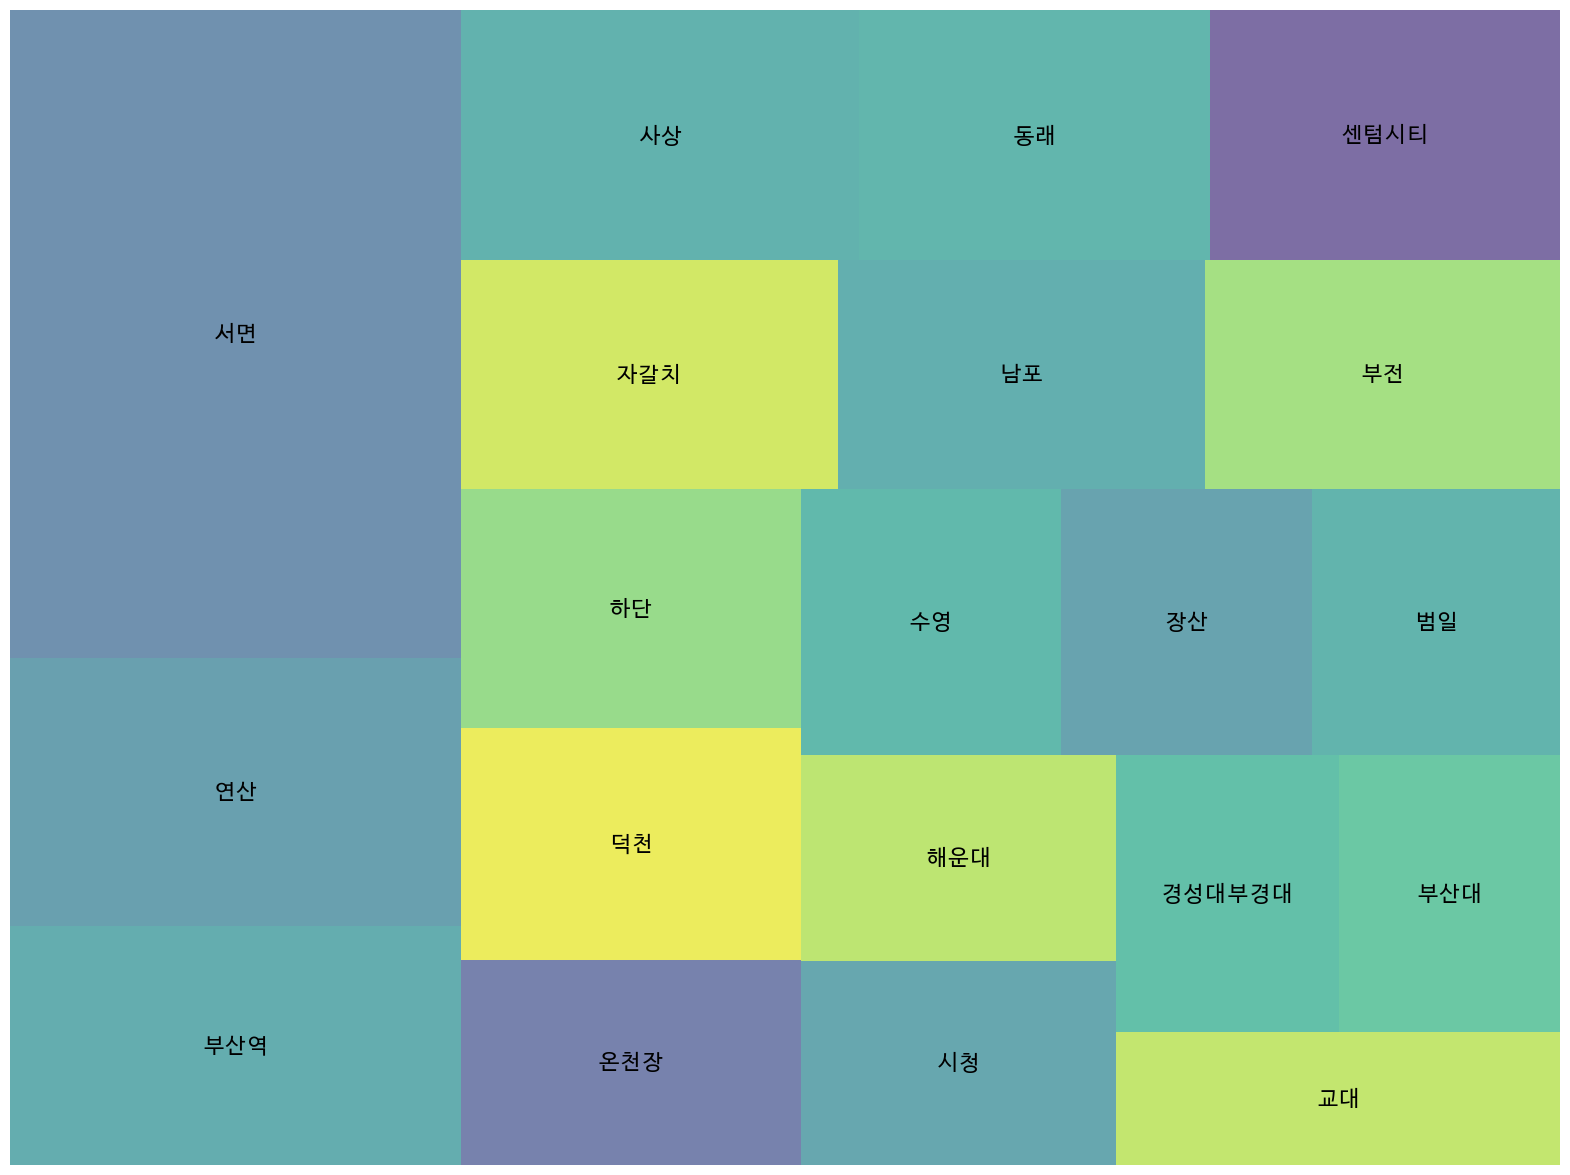

In [68]:
import squarify
plt.figure(figsize=(20,15))
squarify.plot(sizes = total_data['total'], label = total_data['name'], alpha = 0.7)
plt.rcParams['font.size'] = 16
# plt.rcParams['text.color'] = "blue"
plt.gca().invert_yaxis()
plt.axis("off")
plt.show()

In [1]:
import pandas as pd
file_path = './ref/경상남도 김해시_경전철 역사별 시간대별 승하차 인원 정보_20241225.csv'
gimhea = pd.read_csv(file_path, encoding="EUC-KR")
gimhea.head() # 맨 앞 데이터 5개 가져오기
# df.tail()

,분류,영업일자,역사명,합계,00시 인원,01시 인원,02시 인원,03시 인원,04시 인원,05시 인원,...,14시 인원,15시 인원,16시 인원,17시 인원,18시 인원,19시 인원,20시 인원,21시 인원,22시 인원,23시 인원
0,승차,2023-12-15,사상,8915,0,0,0,0,36,300,...,433,478,503,638,664,446,408,270,270,178
1,승차,2023-12-15,괘법 르네시떼,1446,0,0,0,0,9,55,...,71,55,81,99,135,65,53,32,23,14
2,승차,2023-12-15,서부산 유통지구,1587,0,0,0,0,1,8,...,82,76,155,498,362,70,33,17,7,3
3,승차,2023-12-15,공항,5731,0,0,0,0,0,4,...,346,354,438,583,404,355,379,419,258,56
4,승차,2023-12-15,덕두,1454,0,0,0,0,0,7,...,65,55,106,321,285,54,37,30,21,3


In [2]:
gimhea.columns

Index(['분류', '영업일자', '역사명', '합계', '00시 인원', '01시 인원', '02시 인원', '03시 인원',
       '04시 인원', '05시 인원', '06시 인원', '07시 인원', '08시 인원', '09시 인원', '10시 인원',
       '11시 인원', '12시 인원', '13시 인원', '14시 인원', '15시 인원', '16시 인원', '17시 인원',
       '18시 인원', '19시 인원', '20시 인원', '21시 인원', '22시 인원', '23시 인원'],
      dtype='object')

In [3]:
columns = ['num', 'name', 'type', 'total']
time_col = [f'{i}H' for i in range(0,23)]
columns = columns + time_col + ['00~23H']
gimhea.columns = columns
gimhea = gimhea.loc[:,:'total']
# gimhea

In [5]:
gimhea

,num,name,type,total
0,승차,2023-12-15,사상,8915
1,승차,2023-12-15,괘법 르네시떼,1446
2,승차,2023-12-15,서부산 유통지구,1587
3,승차,2023-12-15,공항,5731
4,승차,2023-12-15,덕두,1454
...,...,...,...,...
15829,하차,2024-12-25,수로왕릉,2576
15830,하차,2024-12-25,박물관,1577
15831,하차,2024-12-25,연지공원,1280
15832,하차,2024-12-25,장신대,2213


In [9]:
data = gimhea.groupby(['name', 'type']).sum().reset_index()
# data[data['date'] == '2025-01-01']
data

,name,type,num,total
0,2023-12-15,가야대,승차하차,6261
1,2023-12-15,공항,승차하차,10367
2,2023-12-15,괘법 르네시떼,승차하차,2877
3,2023-12-15,김해대학,승차하차,2328
4,2023-12-15,김해시청,승차하차,2561
...,...,...,...,...
7912,2024-12-25,연지공원,승차하차,2656
7913,2024-12-25,인제대,승차하차,3198
7914,2024-12-25,장신대,승차하차,4276
7915,2024-12-25,지내,승차하차,1800


In [10]:
gdata = data[['name', 'type', 'total']]
gdata = gdata.sort_values(by=['name', 'type'], ascending=[True, True])
gdata.head(10)

,name,type,total
0,2023-12-15,가야대,6261
1,2023-12-15,공항,10367
2,2023-12-15,괘법 르네시떼,2877
3,2023-12-15,김해대학,2328
4,2023-12-15,김해시청,2561
5,2023-12-15,대사,1050
6,2023-12-15,대저,14154
7,2023-12-15,덕두,2769
8,2023-12-15,등구,504
9,2023-12-15,박물관,3991


In [11]:
mdata = gdata.groupby(by="type").sum().reset_index()
tdata = mdata[['type', 'total']]
tdata

,type,total
0,가야대,1765036
1,공항,3958348
2,괘법 르네시떼,1100102
3,김해대학,692133
4,김해시청,803089
5,대사,350135
6,대저,4808842
7,덕두,868479
8,등구,173083
9,박물관,1199556


In [13]:
sdata = tdata.sort_values(by='total', ascending=False)
sdata.head(10)
total_data = sdata[:]
total_data

,type,total
13,사상,6787810
6,대저,4808842
1,공항,3958348
11,부원,2014881
15,수로왕릉,1868677
0,가야대,1765036
10,봉황,1575396
18,장신대,1546508
17,인제대,1487799
9,박물관,1199556


In [17]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

d2_path = "./ref/D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(d2_path)
plt.rcParams["font.family"] = "D2Coding"

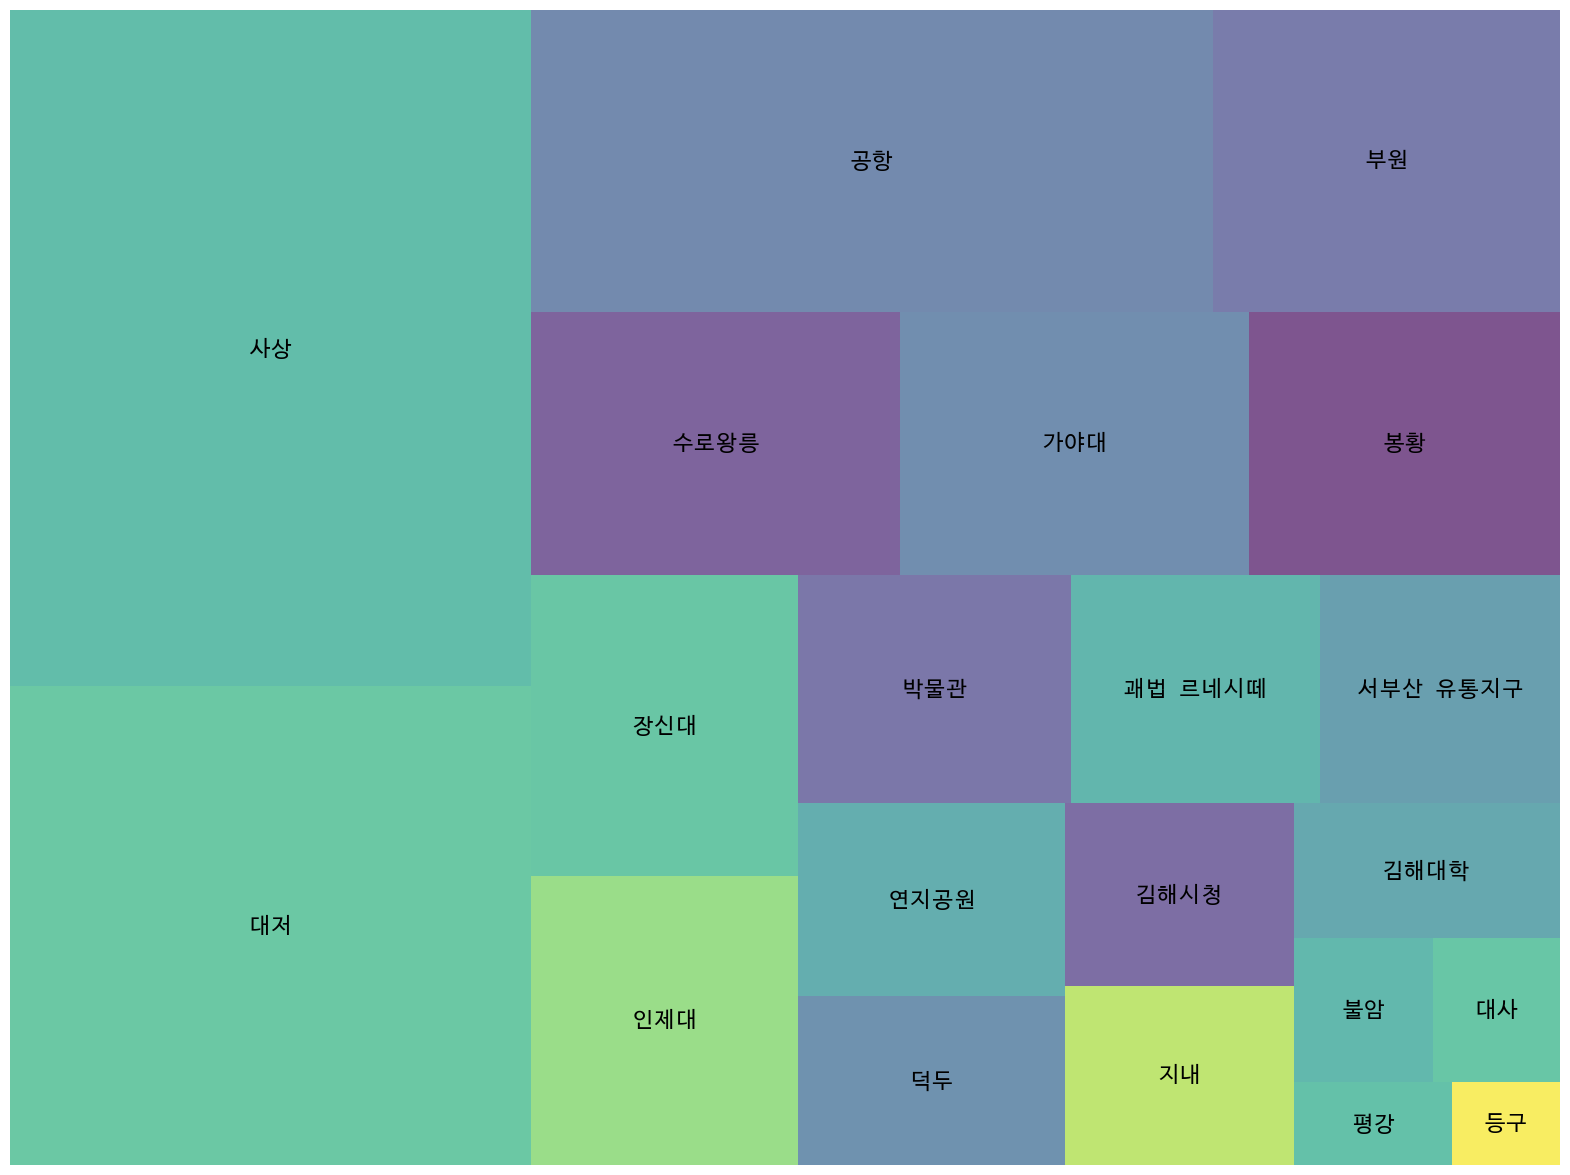

In [19]:
import squarify
plt.figure(figsize=(20,15))
squarify.plot(sizes = total_data['total'], label = total_data['type'], alpha = 0.7)
plt.rcParams['font.size'] = 16
plt.gca().invert_yaxis()
plt.axis("off")
plt.show()